In [65]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import CSV
import csv
# Import json
import json
# Import Pandas
import pandas as pd
# Settingan di Pandas untuk menghilangkan warning
pd.options.mode.chained_assignment = None  # default='warn'

# Import Numpy
import numpy as np

# Loading Bar TQDM
from tqdm import tqdm

# Stopword Removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# Stemming (Sastrawi)
# !pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model

# pad_sequences untuk google colab
# from keras.utils import pad_sequences
# pad_sequences untuk jupter-lab
from keras.utils import pad_sequences

# Pickle FastText
import pickle

# Split Data
from sklearn.model_selection import train_test_split

# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
# from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.backend import clear_session
from keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping

# Callbacks
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Grafik
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
np.random.seed(0)

from tqdm import tqdm
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CWA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def preprocessing(data):
    # Case Folding
    data['lower'] = data['Pertanyaan'].str.lower()
    
    # Punctual Removal
    data['punctual'] = data['lower'].str.replace('[^a-zA-Z]+',' ', regex=True)
    
    # Normalization
    kamus_baku = pd.read_csv('kata_baku.csv', sep=";")
    dict_kamus_baku = kamus_baku[['slang','baku']].to_dict('list')
    dict_kamus_baku = dict(zip(dict_kamus_baku['slang'], dict_kamus_baku['baku']))
    norm = []
    for i in data['punctual']:
        res = " ".join(dict_kamus_baku.get(x, x) for x in str(i).split())
        norm.append(str(res))
    data['normalize'] = norm
    
    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stem = []
    for i in tqdm(data['normalize']):
#     for i in tqdm(data['stopwords']):
        stem.append(stemmer.stem(str(i)))
    data['stemmed'] = stem
    
    return data

In [3]:
def read_data(filename):
    # Membaca file untuk dijadikan Dataframe
    df = pd.read_csv(filename, delimiter=',') 
    return df

In [4]:
# Memanggil Function Read Data
FileIntents = 'Dataset.csv'
df = read_data(FileIntents)
df

,Pertanyaan,Jawaban,Label
0,Berapa umur anak kucing bisa diberi obat cacing?,Anak kucing bisa diberikan obat cacing sejak u...,Kesehatan
1,Anjing saya terkena infeksi jamur. Apa yang bi...,Infeksi jamur harus dipastikan terlebih dahulu...,Kesehatan
2,Anjing saya mengalami infeksi telinga. Apa oba...,"Infeksi biasanya menyebabkan merah, panas, nye...",Kesehatan
3,Hewan peliharaan saya menderita diare. Apa pen...,Diare adalah tanda yang sangat tidak spesifik ...,Kesehatan
4,Anjing saya bertingkah seperti mencoba untuk b...,Anjing bertingkah seperti mencoba untuk batuk ...,Kesehatan
...,...,...,...
309,"Kucing saya suka memakan bulu yang rontok, apa...",Memakan bulu yang rontok bisa berbahaya bagi k...,Perilaku
310,Kucing saya sering menggaruk telinganya tapi t...,Kucing yang sering menggaruk telinganya meskip...,Perilaku
311,"Anjing saya sering menggigit kakinya sendiri, ...",Jika anjing Anda sering menggigit kakinya send...,Perilaku
312,Kenapa anjing sering menjilat hidungnya berleb...,Anjing sering menjilat hidungnya berlebihan se...,Perilaku


In [5]:
df.describe()

,Pertanyaan,Jawaban,Label
count,314,314,314
unique,314,282,3
top,Berapa umur anak kucing bisa diberi obat cacing?,Klinik buka pada hari Senin sampai dengan Jum’...,Kesehatan
freq,1,6,158


In [6]:
# Membuat fungsi label encoder
def encode_label(df):
    # Encoding Categorical Data (Mengubah data kategorikal menjadi angka)
    from sklearn.preprocessing import LabelEncoder
    LE = LabelEncoder()
    df['Label_Encoded'] = LE.fit_transform(df['Label'])
    pickle.dump(LE, open('LE.pkl','wb'))
    return df[['Label', 'Label_Encoded']]

In [7]:
print(encode_label(df))

         Label  Label_Encoded
0    Kesehatan              0
1    Kesehatan              0
2    Kesehatan              0
3    Kesehatan              0
4    Kesehatan              0
..         ...            ...
309   Perilaku              2
310   Perilaku              2
311   Perilaku              2
312   Perilaku              2
313   Perilaku              2

[314 rows x 2 columns]


In [8]:
preprocessing(df)

100%|████████████████████████████████████████████████████████████████████████████████| 314/314 [00:07<00:00, 40.37it/s]


,Pertanyaan,Jawaban,Label,Label_Encoded,lower,punctual,normalize,stemmed
0,Berapa umur anak kucing bisa diberi obat cacing?,Anak kucing bisa diberikan obat cacing sejak u...,Kesehatan,0,berapa umur anak kucing bisa diberi obat cacing?,berapa umur anak kucing bisa diberi obat cacing,berapa umur anak kucing bisa diberi obat cacing,berapa umur anak kucing bisa beri obat cacing
1,Anjing saya terkena infeksi jamur. Apa yang bi...,Infeksi jamur harus dipastikan terlebih dahulu...,Kesehatan,0,anjing saya terkena infeksi jamur. apa yang bi...,anjing saya terkena infeksi jamur apa yang bis...,anjing saya terkena infeksi jamur apa yang bis...,anjing saya kena infeksi jamur apa yang bisa s...
2,Anjing saya mengalami infeksi telinga. Apa oba...,"Infeksi biasanya menyebabkan merah, panas, nye...",Kesehatan,0,anjing saya mengalami infeksi telinga. apa oba...,anjing saya mengalami infeksi telinga apa obat...,anjing saya mengalami infeksi telinga apa obatnya,anjing saya alami infeksi telinga apa obat
3,Hewan peliharaan saya menderita diare. Apa pen...,Diare adalah tanda yang sangat tidak spesifik ...,Kesehatan,0,hewan peliharaan saya menderita diare. apa pen...,hewan peliharaan saya menderita diare apa peny...,hewan peliharaan saya menderita diare apa peny...,hewan pelihara saya derita diare apa sebab dan...
4,Anjing saya bertingkah seperti mencoba untuk b...,Anjing bertingkah seperti mencoba untuk batuk ...,Kesehatan,0,anjing saya bertingkah seperti mencoba untuk b...,anjing saya bertingkah seperti mencoba untuk b...,anjing saya bertingkah seperti mencoba untuk b...,anjing saya ting seperti coba untuk batuk apa ...
...,...,...,...,...,...,...,...,...
309,"Kucing saya suka memakan bulu yang rontok, apa...",Memakan bulu yang rontok bisa berbahaya bagi k...,Perilaku,2,"kucing saya suka memakan bulu yang rontok, apa...",kucing saya suka memakan bulu yang rontok apak...,kucing saya suka memakan bulu yang rontok apak...,kucing saya suka makan bulu yang rontok apakah...
310,Kucing saya sering menggaruk telinganya tapi t...,Kucing yang sering menggaruk telinganya meskip...,Perilaku,2,kucing saya sering menggaruk telinganya tapi t...,kucing saya sering menggaruk telinganya tapi t...,kucing saya sering menggaruk telinganya tapi t...,kucing saya sering garuk telinga tapi tidak ad...
311,"Anjing saya sering menggigit kakinya sendiri, ...",Jika anjing Anda sering menggigit kakinya send...,Perilaku,2,"anjing saya sering menggigit kakinya sendiri, ...",anjing saya sering menggigit kakinya sendiri a...,anjing saya sering menggigit kakinya sendiri a...,anjing saya sering gigit kaki sendiri apa yang...
312,Kenapa anjing sering menjilat hidungnya berleb...,Anjing sering menjilat hidungnya berlebihan se...,Perilaku,2,kenapa anjing sering menjilat hidungnya berleb...,kenapa anjing sering menjilat hidungnya berleb...,kenapa anjing sering menjilat hidungnya berleb...,kenapa anjing sering jilat hidung lebih


In [9]:
# Membagi data menjadi training dan testing
df_training, df_testing = train_test_split(df, test_size=0.2, random_state=40, shuffle=True)

# Reset index untuk memastikan urutan
df_training = df_training.reset_index(drop=True)
df_testing = df_testing.reset_index(drop=True)

In [10]:
# Mengecek panjang kalimat maksimum
longest_string = max(df['stemmed'].values.tolist(), key=len)
max_seq_len = len(longest_string.split())
print(longest_string)
print(max_seq_len)

berapa lama waktu yang butuh untuk timbul reaksi buruk hadap vaksin rabies
12


In [11]:
def tokenize_corpus(data_corpus):
    global corpus_tokenizer
    from keras.preprocessing.text import Tokenizer
    corpus_tokenizer = Tokenizer(oov_token="<OOV>")
    corpus_tokenizer.fit_on_texts(data_corpus['stemmed'])
    corpus_sequences = corpus_tokenizer.texts_to_sequences(data_corpus['stemmed'])
    corpus_word_index = corpus_tokenizer.word_index
    return corpus_sequences, corpus_word_index

def tokenize_training(data_training):
    global model_tokenizer #Menggunakan variabel global agar 'tokenizer' bisa dipake di luar fungsi ini
    from keras.preprocessing.text import Tokenizer
    model_tokenizer = Tokenizer(oov_token = "<OOV>")
    model_tokenizer.fit_on_texts(data_training['stemmed'])
    model_word_index = model_tokenizer.word_index
    train_sequences = model_tokenizer.texts_to_sequences(data_training['stemmed'])
    max_seq_len = pickle.load(open('max_seq_len.pkl', 'rb'))
    train_sequences_padded = pad_sequences(train_sequences, maxlen = max_seq_len)
    return train_sequences, train_sequences_padded, model_word_index

def tokenize_testing(data_testing):
    test_model_sequences = model_tokenizer.texts_to_sequences(data_testing['stemmed'])
    max_seq_len = pickle.load(open('max_seq_len.pkl', 'rb'))
    test_model_sequences_padded = pad_sequences(test_model_sequences, maxlen = max_seq_len)
    test_corpus_sequences = corpus_tokenizer.texts_to_sequences(data_testing['stemmed'])
    return test_model_sequences, test_model_sequences_padded, test_corpus_sequences

In [12]:
corpus_sequences, corpus_word_index = tokenize_corpus(df)
train_sequences, train_sequences_padded, model_word_index  = tokenize_training(df_training)
test_model_sequences, test_model_sequences_padded, test_corpus_sequences = tokenize_testing(df_testing)
print("Sebelum Tokenizer :" , df_training['stemmed'][0])
print("Setelah Tokenizer :" , train_sequences_padded[0])

Sebelum Tokenizer : berapa biaya untuk steril kucing
Setelah Tokenizer : [ 0  0  0  0  0  0  0 28 78 15 79  3]


In [13]:
print("Model Tokenized Word :",len(list(model_word_index.keys())))
print("Corpus Tokenized Word :",len(list(corpus_word_index.keys())))

Model Tokenized Word : 339
Corpus Tokenized Word : 373


In [14]:
pickle.dump(model_tokenizer, open('model_tokenizer.pkl','wb'))
pickle.dump(corpus_tokenizer, open('corpus_tokenizer.pkl','wb'))
pickle.dump(corpus_word_index, open('corpus_word_index.pkl','wb'))

In [15]:
# pertanyaan df_training setelah di sequencing
df_training['Sequences'] = train_sequences

In [16]:
# Pertanyaan df_testing setelah di tokenize
df_testing = df_testing.reset_index(drop=True) #Reset Index
df_testing['Model_Sequences'] = test_model_sequences
df_testing['Corpus_Sequences'] = test_corpus_sequences

In [17]:
df['Sequences'] = corpus_sequences

In [18]:
def load_glove_embeddings(file_path, embedding_dim=300):
    embedding_index = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
    print(f"Found {len(embedding_index)} word vectors.")
    return embedding_index

# Load GloVe embedding (misalnya GloVe 300d)
embedding_dim = 100
glove_file = 'glove.6B.100d.txt'
embedding_index = load_glove_embeddings(glove_file, embedding_dim)


Found 400000 word vectors.


In [ ]:
# def create_embedding_matrix(sequences_padded, tokenizer, embedding_index, embedding_dim, max_seq_len):
#     # Inisialisasi embedding matrix dengan ukuran (jumlah sequence, panjang sequence, dimensi embedding)
#     embedding_matrix = np.zeros((len(sequences_padded), max_seq_len, embedding_dim))
    
#     # Mendapatkan word_index dari tokenizer yang sudah dilatih
#     word_index = tokenizer.word_index
    
#     # Loop melalui setiap sequence
#     for i, sequence in enumerate(sequences_padded):
#         for j, word_idx in enumerate(sequence):
#             if j >= max_seq_len:  # Jika index melebihi max_seq_len, keluar dari loop
#                 break
#             word = tokenizer.index_word.get(word_idx, '')  # Mendapatkan kata berdasarkan index
#             if word in embedding_index:  # Jika kata ada di GloVe embedding
#                 embedding_matrix[i, j] = embedding_index[word]  # Ambil vektor dari embedding_index
#             else:
#                 # Jika kata tidak ada di GloVe, berikan vektor random
#                 embedding_matrix[i, j] = np.random.uniform(-0.25, 0.25, embedding_dim)

#     return embedding_matrix

In [19]:
def create_embedding_matrix(tokenizer, embedding_index, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1  # +1 untuk token padding
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    # Loop melalui setiap kata dalam word_index
    for word, i in tokenizer.word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # Jika embedding vector ditemukan di GloVe, masukkan ke dalam embedding_matrix
            embedding_matrix[i] = embedding_vector
        else:
            # Jika tidak ditemukan, bisa menggunakan vektor acak atau biarkan tetap nol
            embedding_matrix[i] = np.random.uniform(-0.25, 0.25, embedding_dim)
    
    return embedding_matrix


In [20]:
# Membuat embedding matrix berdasarkan vocabulary
embedding_dim = 100 
train_embedding_matrix = create_embedding_matrix(model_tokenizer, embedding_index, embedding_dim)

# Periksa shape dari embedding matrix
print(f"Embedding matrix shape: {train_embedding_matrix.shape}")  # Seharusnya (vocab_size, embedding_dim)

Embedding matrix shape: (340, 100)


In [23]:
# Hitung jumlah kelas unik dari kolom Label
num_classes = len(df['Label'].unique())

print(f"Jumlah kelas: {num_classes}")

Jumlah kelas: 3


In [24]:
# Konversi label ke one-hot encoded
y_train = pd.get_dummies(df_training['Label']).values
y_test = pd.get_dummies(df_testing['Label']).values

In [25]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = Sequential()
model.add(Embedding(input_dim=len(model_tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    input_length=max_seq_len,
                    weights=[train_embedding_matrix],
                    trainable=True))
model.add(LSTM(32))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 12, 100)           34000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 51,123
Trainable params: 51,123
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Melatih model
history = model.fit(train_sequences_padded, y_train,
                    epochs=100,
                    batch_size=32,
                    callbacks = [early_stopping],
                    validation_split=0.1)

Epoch 1/100
8/8 [==============================] - 4s 143ms/step - loss: 1.0716 - accuracy: 0.5378 - val_loss: 1.0902 - val_accuracy: 0.4615
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.9671 - accuracy: 0.6444 - val_loss: 1.0486 - val_accuracy: 0.3846
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8895 - accuracy: 0.6489 - val_loss: 1.0086 - val_accuracy: 0.3846
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8149 - accuracy: 0.6889 - val_loss: 0.9712 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.7358 - accuracy: 0.7333 - val_loss: 0.9300 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.6557 - accuracy: 0.7733 - val_loss: 0.8569 - val_accuracy: 0.5385
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5708 - accuracy: 0.8444 - val_loss: 0.7657 - val_accuracy: 0.6923
Epoch 8/100
8/8 [==

In [28]:
model.save('lstm_chatbot.h5', history)

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


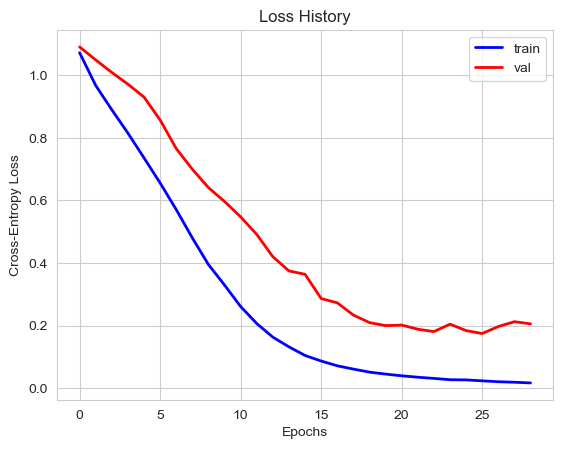

In [29]:
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title("Loss History")
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

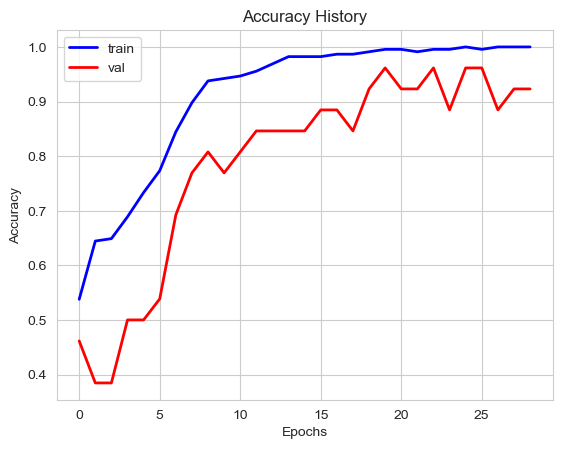

In [30]:
plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title("Accuracy History")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [31]:
model = load_model('lstm_chatbot.h5')

In [58]:

# Mendapatkan nilai akhir loss dan accuracy
final_train_loss = history.history['loss'][-1] * 100
final_val_loss = history.history['val_loss'][-1] * 100
final_train_accuracy = history.history['accuracy'][-1] * 100  # Konversi ke persen
final_val_accuracy = history.history['val_accuracy'][-1] * 100  # Konversi ke persen

# Menampilkan nilai
print(f"Final Training Loss: {final_train_loss:.2f}")
print(f"Final Validation Loss: {final_val_loss:.2f}")
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")


Final Training Loss: 1.73
Final Validation Loss: 20.59
Final Training Accuracy: 100.00%
Final Validation Accuracy: 92.31%


In [54]:
# Mengecek training accuracy
train_loss, train_accuracy = model.evaluate(train_sequences_padded, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss * 100:.2f}%")


# Mengecek test accuracy
test_loss, test_accuracy = model.evaluate(test_model_sequences_padded, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 99.60%
Training Loss: 3.74%
Test Accuracy: 90.48%


In [33]:
# Melakukan prediksi pada data testing
y_pred = model.predict(test_model_sequences_padded)

# Mengambil label dengan nilai probabilitas tertinggi (untuk multi-kelas)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mengambil label asli dari data testing
y_test_labels = np.argmax(y_test, axis=1)


2/2 [==============================] - 1s 10ms/step


In [34]:
# Buat dataframe untuk menampilkan hasil prediksi, label asli, dan input
df_results = pd.DataFrame({
    'Pertanyaan': df_testing['Pertanyaan'],      # Kolom pertanyaan dari data testing
    'Prediksi': y_pred_labels,                   # Hasil prediksi model
    'Label Asli': y_test_labels                  # Label asli dari data testing
})

# Menampilkan tabel hasil
print(df_results)  # Tampilkan beberapa baris pertama dari hasil

                                           Pertanyaan  Prediksi  Label Asli
0                         Bisa periksa usg di klinik?         1           0
1   Kucing saya sering kencing di sudut rumah, apa...         2           2
2                   Berapa biaya untuk steril anjing?         1           1
3                              Di mana lokasi klinik?         1           1
4                             Apa itu konjungtivitis?         0           0
..                                                ...       ...         ...
58          apa yg harus dilakukan kalo hewan kejang?         0           0
59         Ada berapa dokter yang bertugas di klinik?         1           1
60    Anjing saya tidak buang air besar setelah diare         2           0
61  Hewan peliharaan saya menderita diare. Apa pen...         0           0
62         Apakah ada layanan perawatan kulit khusus?         1           1

[63 rows x 3 columns]


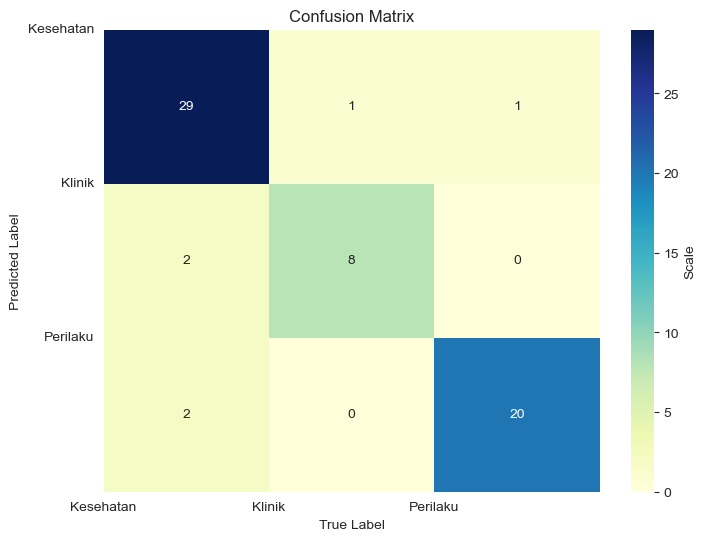

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.89      0.80      0.84        10
           2       0.95      0.91      0.93        22

    accuracy                           0.90        63
   macro avg       0.91      0.88      0.89        63
weighted avg       0.91      0.90      0.90        63



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Visualisasi confusion matrix dengan gaya serupa gambar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Scale'})
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks(ticks=np.arange(len(conf_matrix)), labels=['Kesehatan', 'Klinik', 'Perilaku'], rotation=0)
plt.yticks(ticks=np.arange(len(conf_matrix)), labels=['Kesehatan', 'Klinik', 'Perilaku'], rotation=0)

plt.show()

# Print classification report untuk performa model
print(classification_report(y_test_labels, y_pred_labels))


In [36]:
def predict_test(model,test_sequences_padded):
    categorical_predicted_label = []
    onehot_predicted_label = model.predict(test_sequences_padded)
    for i in range(0,len(test_sequences_padded)):
        categorical_predicted_label.append(onehot_predicted_label[i].argmax())
    return onehot_predicted_label, categorical_predicted_label

In [37]:
pd.set_option("display.max_rows", None)
onehot_predicted_label, df_testing['Predicted_Label'] = predict_test(model,test_model_sequences_padded)
df_testing[['Pertanyaan','Label_Encoded','Predicted_Label']].loc[df_testing['Label_Encoded'] != df_testing['Predicted_Label']]

2/2 [==============================] - 0s 7ms/step


,Pertanyaan,Label_Encoded,Predicted_Label
0,Bisa periksa usg di klinik?,0,1
27,Gimana caranya kalau mau vaksin di klinik?,1,0
35,Mengapa anjing memakan kotoran?,2,0
48,Saya baru mulai memelihara anak kucing. Apa ha...,2,0
52,Kucing saya matanya sakit dan badannya kurus a...,1,0
60,Anjing saya tidak buang air besar setelah diare,0,2


In [38]:
# Pembagian dataframe_corpus berdasarkan label untuk matching
df_Kesehatan = df[['Pertanyaan','Jawaban','Sequences']].loc[df['Label_Encoded']==int(0)].reset_index(drop=True)
df_Klinik = df[['Pertanyaan','Jawaban','Sequences']].loc[df['Label_Encoded']==int(1)].reset_index(drop=True)
df_Perilaku = df[['Pertanyaan','Jawaban','Sequences']].loc[df['Label_Encoded']==int(2)].reset_index(drop=True)

In [39]:
pickle.dump(df_Kesehatan, open('df_Kesehatan.pkl','wb'))
pickle.dump(df_Klinik, open('df_Klinik.pkl','wb'))
pickle.dump(df_Perilaku, open('df_Perilaku.pkl','wb'))

In [40]:
# Pembagian dataframe_testing berdasarkan predicted label untuk matching
def matching_testing(df_testing):
    Prediksi_Jawaban = []
    for row in range(len(df_testing)):
        #Mengambil Predicted_Label per baris
        Predicted_Label = df_testing['Predicted_Label'].iloc[row] 
        # Menentukan df yang dipakai untuk matching
        if(Predicted_Label==0):
            df_IPO = pickle.load(open('df_Kesehatan.pkl', 'rb'))
            check_df = df_Kesehatan
        elif(Predicted_Label==1):
            df_Investasi = pickle.load(open('df_Klinik.pkl', 'rb'))
            check_df = df_Klinik
        elif(Predicted_Label==2):
            df_Istilah = pickle.load(open('df_Perilaku.pkl', 'rb'))
            check_df = df_Perilaku
    
        Compatibility = [0]*len(check_df)
        
        # Looping tiap baris Sequences check_df
        index = 0
        for check_sequences in check_df['Sequences']:
            # Looping tiap element Sequences df testing per baris
            for element in df_testing['Corpus_Sequences'].iloc[row]:
                if(element in check_sequences):
                    Compatibility[index]+=1
            print()
            Compatibility[index] = Compatibility[index]/len(df_testing['Corpus_Sequences'].iloc[row])
            index += 1
    
        index_max_compatibility = []
        for idx, value in enumerate(Compatibility):
            if value == max(Compatibility):
                index_max_compatibility.append(idx)

        perfect_compatibilty_sequence = []
        perfect_compatibilty_index = 0
        for idx in index_max_compatibility:
            if (idx == index_max_compatibility[0]):
                perfect_compatibilty_sequence = check_df['Sequences'].iloc[idx]
                perfect_compatibilty_index = idx
            else:
                if(len(check_df['Sequences'].iloc[idx]) <= len(perfect_compatibilty_sequence)):
                    perfect_compatibilty_sequence = check_df['Sequences'].iloc[idx]
                    perfect_compatibilty_index = idx

        Prediksi_Jawaban.append(check_df['Jawaban'].iloc[perfect_compatibilty_index])
    return Prediksi_Jawaban

In [41]:
Prediksi_Jawaban = matching_testing(df_testing)
df_testing['Prediksi_Jawaban'] = Prediksi_Jawaban

In [42]:
df_testing[['Pertanyaan','Jawaban','Prediksi_Jawaban']]

,Pertanyaan,Jawaban,Prediksi_Jawaban
0,Bisa periksa usg di klinik?,"Mohon maaf, namun saat ini layanan Ultrasonogr...","Mohon maaf, namun saat ini layanan Ultrasonogr..."
1,"Kucing saya sering kencing di sudut rumah, apa...",Jika kucing Anda sering kencing di sudut rumah...,Jika kucing Anda sering kencing di sudut rumah...
2,Berapa biaya untuk steril anjing?,"Mohon maaf, namun saat ini tindakan steril dan...","Mohon maaf, namun saat ini tindakan steril dan..."
3,Di mana lokasi klinik?,Unit Pelaksana Teknis (UPT) Klinik Hewan Dinas...,Unit Pelaksana Teknis (UPT) Klinik Hewan Dinas...
4,Apa itu konjungtivitis?,Konjungtivitis adalah peradangan atau infeksi ...,Konjungtivitis adalah peradangan atau infeksi ...
5,Bagaimana melatih anjing untuk tidak takut ber...,Bantu anjing Anda mengatasi rasa takutnya deng...,Bantu anjing Anda mengatasi rasa takutnya deng...
6,Apakah kucing rumahan bisa terkena kutu?,Kutu dapat memasuki rumah Anda dari baju yang ...,Kutu dapat memasuki rumah Anda dari baju yang ...
7,Kenapa kucing suka tidur di kepala saya?,Ini adalah perilaku kucing untuk mempererat hu...,Ini adalah perilaku kucing untuk mempererat hu...
8,Anjing batuk dan mendengus semakin parah,Anjing batuk dan mendengus dapat disebabkan ol...,Anjing batuk dan mendengus dapat disebabkan ol...
9,gmn cara ngerawat abses kucing?,Cara merawat abses kucing adalah dengan menjag...,Cara merawat abses kucing adalah dengan menjag...


In [43]:
df_testing[['Pertanyaan','Jawaban','Prediksi_Jawaban']].loc[df_testing['Jawaban']!=df_testing['Prediksi_Jawaban']]

,Pertanyaan,Jawaban,Prediksi_Jawaban
27,Gimana caranya kalau mau vaksin di klinik?,Anda bisa langsung datang membawa hewan peliha...,Cara mengobati diare yang dapat dilakukan send...
35,Mengapa anjing memakan kotoran?,Anjing memakan kotoran menurut beberapa teori ...,"Anjing makan kotoran, dijelaskan oleh beberapa..."
48,Saya baru mulai memelihara anak kucing. Apa ha...,Sosialisasi adalah kunci untuk memiliki anak k...,Hal yang perlu diperhatikan saat merawat abses...
52,Kucing saya matanya sakit dan badannya kurus a...,"Ya, kucing yang matanya sakit bisa diobati di ...",Obat tetes mata untuk manusia sebaiknya tidak ...
60,Anjing saya tidak buang air besar setelah diare,Anjing tidak buang air besar setelah diare mun...,Anjing tiba-tiba takut dengan air bisa disebab...


In [44]:
le = pickle.load(open('LE.pkl', 'rb'))
df_testing['Predicted_Label'] = le.inverse_transform(df_testing['Predicted_Label'])
excel = df_testing[['Pertanyaan','stemmed','Model_Sequences','Predicted_Label','Label','Corpus_Sequences']]
excel.to_excel("pengujian_model.xlsx")

In [45]:
!jupyter nbconvert --to script chatbot_model.ipynb

[NbConvertApp] Converting notebook chatbot_model.ipynb to script
[NbConvertApp] Writing 17160 bytes to chatbot_model.py
